In [ ]:
pip install jyquickhelper

In [ ]:
pwd

'/content'

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

# Sommaire

## Description du projet

### Quel sont les objectifs



L'objectif initial est de se famliariser avec le monde de la finance et les données financières. Pour cela on se concentre sur les actions boursieres Facebook et Apple, sur lesquelles on essaye de prédire le prix journalier de fermeture, la différence de prix pendant deux jours (le delta) et enfin de prendre des décisions en classifiant ................

### Quelle bases de données

Nous avons commencé par scrapper à la main le prix des actions, ce qui n'était pas efficace. Puis on a utilisé différentes API Alphavantage, Tiingo, YahooFinance.............

### Méthodologie et modèles

On utilise des méthodes de Machine Learning, et des méthodes de Deep Learning, on compare les résultat pour ne retenir que les plus performants parmi : 

1.   Regression Linéaire
2.   Random forest
3.   ...




Les données étant des series temporelles ......

### Résultats

## Code

### Récupération des données

Il y a dans la partie "scrap_data différentes méthodes de scrapping, a la main et via des API. Ici nous retenons la troisième méthode avec la librairie pandas_datareader

In [524]:
import pandas_datareader as web
import pandas as pd
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('today')

df_web_aapl = web.DataReader('AAPL', data_source='yahoo', start=start, end=end)[:2156]
df_web_aapl.columns = ['High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Close_AAPL', 'Volume_AAPL', 'Adj_Close_AAPL']
df_web_fb = web.DataReader('FB', data_source='yahoo', start=start, end=end)[:2156]
df_web_fb.columns = ['High_FB', 'Low_FB', 'Open_FB', 'Close_FB', 'Volume_FB', 'Adj_Close_FB']
df_web_amzn = web.DataReader('AMZN', data_source='yahoo', start=start, end=end)[:2156]
df_web_amzn.columns = ['High_AMZN', 'Low_AMZN', 'Open_AMZN', 'Close_AMZN', 'Volume_AMZN', 'Adj_Close_AMZN']
df_web_googl = web.DataReader('GOOGL', data_source='yahoo', start=start, end=end)[:2156]
df_web_googl.columns = ['High_GOOGL', 'Low_GOOGL', 'Open_GOOGL', 'Close_GOOGL', 'Volume_GOOGL', 'Adj_Close_GOOGL']
df_web_vix = web.DataReader('^VIX', data_source='yahoo', start=start, end=end)[:2156]
df_web_vix.columns = ['High_VIX', 'Low_VIX', 'Open_VIX', 'Close_VIX', 'Volume_VIX', 'Adj_Close_VIX']
df_web_vix = df_web_vix[['High_VIX', 'Low_VIX', 'Open_VIX', 'Close_VIX']]

df_web_gold = web.DataReader('GOLD', data_source='yahoo', start=start, end=end)[:2156]
df_web_gold.columns = ['High_GOLD', 'Low_GOLD', 'Open_GOLD', 'Close_GOLD', 'Volume_GOLD', 'Adj_Close_GOLD']


list_stocks = ["FB", "AAPL", "AMZN", "GOOGL"]

df_gafa_and_vix =pd.concat([df_web_aapl,df_web_amzn,df_web_gold,df_web_vix], axis=1)  # je mets pas celui de fb psq ca marche pas

df_gafa_and_vix = df_gafa_and_vix[:-225]

df_gafa_and_vix.head()


# import pandas_datareader as web
# import pandas as pd
# start = pd.to_datetime('2012-01-01')
# end = pd.to_datetime('today')

# df_web_aapl = web.DataReader('AAPL', data_source='yahoo', start=start, end=end)[:2156]
# df_web_aapl.columns = ['High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Close_AAPL', 'Volume_AAPL', 'Adj_Close_AAPL']
# df_web_fb = web.DataReader('FB', data_source='yahoo', start=start, end=end)[:2156]
# df_web_fb.columns = ['High_FB', 'Low_FB', 'Open_FB', 'Close_FB', 'Volume_FB', 'Adj_Close_FB']
# df_web_amzn = web.DataReader('AMZN', data_source='yahoo', start=start, end=end)[:2156]
# df_web_amzn.columns = ['High_AMZN', 'Low_AMZN', 'Open_AMZN', 'Close_AMZN', 'Volume_AMZN', 'Adj_Close_AMZN']
# df_web_googl = web.DataReader('GOOGL', data_source='yahoo', start=start, end=end)[:2156]
# df_web_googl.columns = ['High_GOOGL', 'Low_GOOGL', 'Open_GOOGL', 'Close_GOOGL', 'Volume_GOOGL', 'Adj_Close_GOOGL']
# df_web_vix = web.DataReader('^VIX', data_source='yahoo', start=start, end=end)[:2156]
# df_web_vix.columns = ['High_VIX', 'Low_VIX', 'Open_VIX', 'Close_VIX', 'Volume_VIX', 'Adj_Close_VIX']
# df_web_vix = df_web_vix[['High_VIX', 'Low_VIX', 'Open_VIX', 'Close_VIX']]
# df_web_samsung = web.DataReader('005930.KS', 'yahoo', start , end)[:2156]
# df_web_samsung.columns= ['High_SAMSUNG', 'Low_SAMSUNG', 'Open_SAMSUNG', 'Close_SAMSUNG', 'Volume_SAMSUNG', 'Adj_Close_SAMSUNG']

# list_stocks = ["SAMSUNG", "AAPL", "AMZN", "GOOGL"]

# df_gafa_and_vix =pd.concat([df_web_aapl,df_web_amzn,df_web_googl,df_web_samsung,df_web_vix], axis=1)  # je mets pas celui de fb psq ca marche pas

# df_gafa_and_vix = df_gafa_and_vix[1:-220]
# df_gafa_and_vix.head()


,High_AAPL,Low_AAPL,Open_AAPL,Close_AAPL,Volume_AAPL,Adj_Close_AAPL,High_AMZN,Low_AMZN,Open_AMZN,Close_AMZN,...,High_GOLD,Low_GOLD,Open_GOLD,Close_GOLD,Volume_GOLD,Adj_Close_GOLD,High_VIX,Low_VIX,Open_VIX,Close_VIX
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.566676,179.479996,175.550003,175.889999,179.029999,...,47.770000,46.200001,46.270000,47.509998,9010200.0,41.618229,23.100000,22.540001,22.950001,22.969999
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.634213,180.500000,176.070007,179.210007,177.509995,...,48.490002,47.330002,47.480000,48.220001,8905400.0,42.240177,23.730000,22.219999,23.440001,22.219999
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.774481,178.250000,174.050003,175.940002,177.610001,...,48.520000,47.419998,47.720001,48.020000,5800800.0,42.064991,23.090000,21.340000,22.750000,21.480000
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.908023,184.649994,177.500000,178.070007,182.610001,...,48.299999,47.270000,48.299999,47.540001,4527100.0,41.644520,21.719999,20.580000,21.240000,20.629999
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.887549,184.369995,177.000000,182.759995,178.559998,...,48.029999,47.250000,47.720001,47.709999,3958600.0,41.793423,21.780001,21.000000,21.670000,21.070000


In [525]:
df_gafa_and_vix.isnull().sum()

High_AAPL         0
Low_AAPL          0
Open_AAPL         0
Close_AAPL        0
Volume_AAPL       0
Adj_Close_AAPL    0
High_AMZN         0
Low_AMZN          0
Open_AMZN         0
Close_AMZN        0
Volume_AMZN       0
Adj_Close_AMZN    0
High_GOLD         0
Low_GOLD          0
Open_GOLD         0
Close_GOLD        0
Volume_GOLD       0
Adj_Close_GOLD    0
High_VIX          0
Low_VIX           0
Open_VIX          0
Close_VIX         0
dtype: int64

df_gafa_and_vix est donc un gros dataframe avec les prix journaliers (close, open, high, low,adj_close) des GAFA et de l'indicateur VIX (l'indicateur de volatilité du marché).

Nous avons intégré le VIX car avant cela nous avions testé des modèles pour prédire le prix journalier de fermetrure (le close) d'Apple et nous avions un jeu de test bien différent du jeu de train. En effet d'une part nous n'avions pas mélangé nos données durant l'entrainement pour garder la temporalité de nos données, mais nous avons remarqué que le jeu de test correspondait exactement à la periode de coronavirus. Il nous a donc semblé pertinent d'ajouter l'indicateur de volatilité du marché.

# Statistiques descriptives

In [526]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

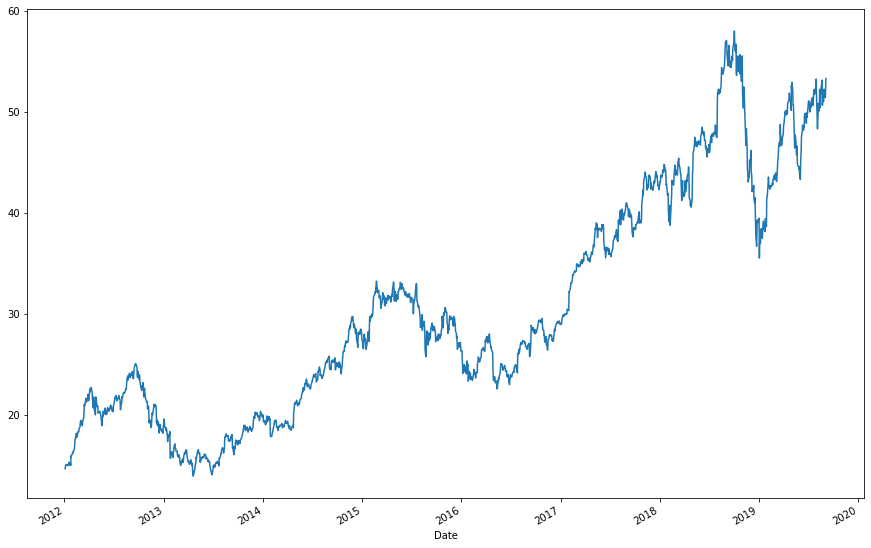

In [527]:
plt.figure(figsize=(15,10))


df_gafa_and_vix['Close_AAPL'].plot()

In [528]:
df_gafa_and_vix.columns

Index(['High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Close_AAPL', 'Volume_AAPL',
       'Adj_Close_AAPL', 'High_AMZN', 'Low_AMZN', 'Open_AMZN', 'Close_AMZN',
       'Volume_AMZN', 'Adj_Close_AMZN', 'High_GOLD', 'Low_GOLD', 'Open_GOLD',
       'Close_GOLD', 'Volume_GOLD', 'Adj_Close_GOLD', 'High_VIX', 'Low_VIX',
       'Open_VIX', 'Close_VIX'],
      dtype='object')

<AxesSubplot:>

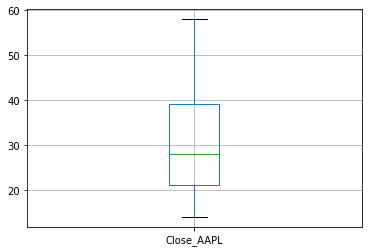

In [529]:
df_gafa_and_vix.boxplot(column = 'Close_AAPL')

In [530]:
"Close_AAPL"=="Close_APPL"

False

In [531]:
df_gafa_and_vix["Close_AAPL"].describe()

count    1931.000000
mean       30.420702
std        11.178842
min        13.947500
25%        21.162500
50%        27.900000
75%        39.102501
max        58.017502
Name: Close_AAPL, dtype: float64

### regression linéaire

In [532]:
import statsmodels.api as sm

In [533]:
#vecteur cible
XTrain = df_gafa_and_vix[['High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', 'Adj_Close_AAPL','High_AMZN', 'Low_AMZN', 'Open_AMZN', 'Close_AMZN', 'Volume_AMZN','Adj_Close_AMZN','High_GOLD', 'Low_GOLD', 'Open_GOLD', 'Close_GOLD', 'Volume_GOLD', 'Adj_Close_GOLD', 'High_VIX', 'Low_VIX', 'Open_VIX', 'Close_VIX']]
yTrain = df_gafa_and_vix[['Close_AAPL']]
#lancer la régression
reg = sm.OLS(yTrain,XTrain)
resReg = reg.fit()

In [534]:
#affichage
print(resReg.summary())

                                 OLS Regression Results                                
Dep. Variable:             Close_AAPL   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.089e+06
Date:                Sun, 13 Dec 2020   Prob (F-statistic):                        0.00
Time:                        15:34:41   Log-Likelihood:                          1370.8
No. Observations:                1931   AIC:                                     -2702.
Df Residuals:                    1911   BIC:                                     -2590.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

# Selection de variables

In [540]:
#XTrain = df_gafa_and_vix[['High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', 'Adj_Close_AAPL','High_AMZN', 'Low_AMZN', 'Open_AMZN', 'Close_AMZN', 'Volume_AMZN','Adj_Close_AMZN','High_GOOGL', 'Low_GOOGL', 'Open_GOOGL', 'Close_GOOGL', 'Volume_GOOGL', 'Adj_Close_GOOGL','High_SAMSUNG', 'Low_SAMSUNG', 'Open_SAMSUNG', 'Close_SAMSUNG', 'Volume_SAMSUNG', 'Adj_Close_SAMSUNG',  'High_VIX', 'Low_VIX', 'Open_VIX', 'Close_VIX']]
#XTrain = df_gafa_and_vix[['High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', 'Adj_Close_AAPL','High_AMZN', 'Low_AMZN', 'Open_AMZN', 'Close_AMZN', 'Volume_AMZN','Adj_Close_AMZN','High_GOOGL', 'Low_GOOGL', 'Open_GOOGL', 'Close_GOOGL', 'Volume_GOOGL', 'Adj_Close_GOOGL', 'High_VIX', 'Low_VIX', 'Open_VIX', 'Close_VIX']]
XTrain = df_gafa_and_vix[['High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', 'Adj_Close_AAPL','High_AMZN', 'Low_AMZN', 'Open_AMZN', 'Close_AMZN', 'Volume_AMZN','Adj_Close_AMZN','High_GOLD', 'Low_GOLD', 'Open_GOLD', 'Close_GOLD', 'Volume_GOLD', 'Adj_Close_GOLD', 'High_VIX', 'Low_VIX', 'Open_VIX', 'Close_VIX']]
yTrain = df_gafa_and_vix[['Close_AAPL']]
#XTrain et yTrain pour le format df
from sklearn.linear_model import LinearRegression
model = LinearRegression()#Initializing RFE model
rfe = RFE(model, 7)#Transforming data using RFE
X_rfe = rfe.fit_transform(XTrain,yTrain)  #Fitting the data to model
model.fit(X_rfe,yTrain)
print(rfe.support_)
print(rfe.ranking_)
print(XTrain.shape)

[ True  True  True False  True False False False False False False False
 False False  True False  True False False False  True]
[ 1  1  1 15  1  9  6 11  8 14  7  4  5 12  1 13  1  2  3 10  1]
(1931, 21)


/home/berrebi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


#### résultats de la selection

Comme attendu les informations concernants APPLE sont toutes retenues sauf le volume journalier, mais aussi la valeur de l'indice de volatilité à la fermeture et le cours de l'or à la fermeture.

In [547]:
df_train_rfe_et_close = df_gafa_and_vix[['High_AAPL','Close_AAPL', 'Low_AAPL', 'Open_AAPL', 'Adj_Close_AAPL', 'Adj_Close_GOLD', 'Close_VIX']]

In [536]:
# Reg
#vecteur cible
XTrain = df_train_rfe_et_close[['High_AAPL', 'Low_AAPL', 'Open_AAPL','Adj_Close_AAPL','Open_VIX','Close_VIX']]
yTrain = df_train_rfe_et_close[['Close_AAPL']]
#lancer la régression
reg = sm.OLS(yTrain,XTrain)
resReg = reg.fit()

In [537]:
print(resReg.summary())

                                 OLS Regression Results                                
Dep. Variable:             Close_AAPL   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.451e+07
Date:                Sun, 13 Dec 2020   Prob (F-statistic):                        0.00
Time:                        15:35:10   Log-Likelihood:                          892.88
No. Observations:                1931   AIC:                                     -1774.
Df Residuals:                    1925   BIC:                                     -1740.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

###  nettoyage des données

#### suppression des valeurs manquantes

In [548]:
print(df_train_rfe_et_close['Close_AAPL'].isnull().sum())

0


Il n'y a pas de valeurs nan dans ce datframe

### ajouts

#### Moyenne mobile

In [552]:
# Création de la moyenne mobile exponentielle
df_stock = df_train_rfe_et_close['Close_AAPL']
ema = pd.Series.ewm(df_stock, span=26).mean()
dataset_ema = np.reshape(ema.values,(len(ema),1))
df_train_rfe_et_close["moyenne_mobile"] = dataset_ema
ema.values

/home/berrebi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


array([14.6867857 , 14.72776804, 14.80029963, ..., 51.43970837,
       51.50324854, 51.6378227 ])

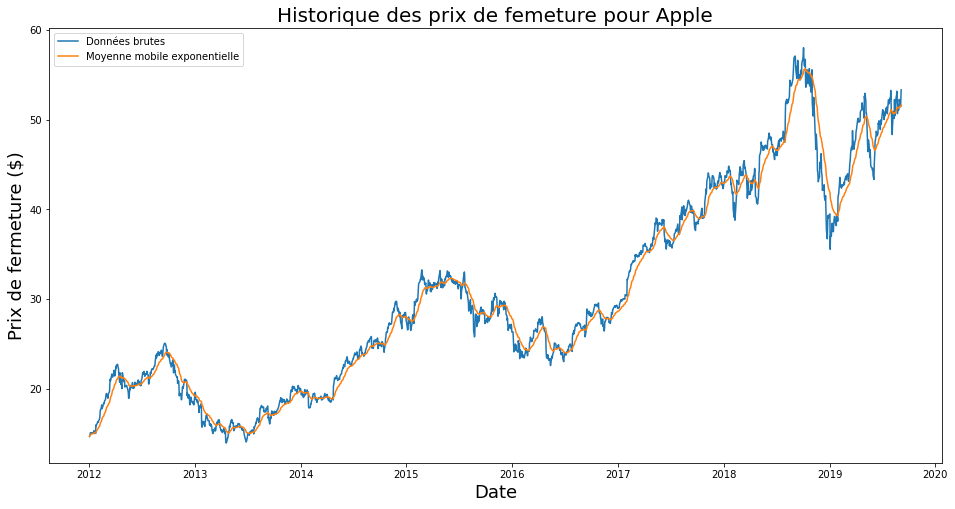

In [553]:
# Visualisation des prix de fermeture
plt.figure(figsize=(16,8))
plt.title('Historique des prix de femeture pour Apple', fontsize=20)
plt.plot(df_stock)
plt.plot(ema)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Prix de fermeture ($)', fontsize=18)
plt.legend(['Données brutes','Moyenne mobile exponentielle'])
plt.show()

In [554]:
df_train_rfe_et_close.head()

,High_AAPL,Close_AAPL,Low_AAPL,Open_AAPL,Adj_Close_AAPL,Adj_Close_GOLD,Close_VIX,moyenne_mobile
Date,,,,,,,,
2012-01-03,14.732142,14.686786,14.607142,14.621428,12.566676,41.618229,22.969999,14.686786
2012-01-04,14.810000,14.765715,14.617143,14.642858,12.634213,42.240177,22.219999,14.727768
2012-01-05,14.948215,14.929643,14.738214,14.819643,12.774481,42.064991,21.480000,14.800300
2012-01-06,15.098214,15.085714,14.972143,14.991786,12.908023,41.644520,20.629999,14.880089
2012-01-09,15.276786,15.061786,15.048214,15.196428,12.887549,41.793423,21.070000,14.922225


In [640]:
df_train_rfe_et_close.to_csv(f'./df_with_aapl_gold__moyenne_mobile_and_vix.csv')

    

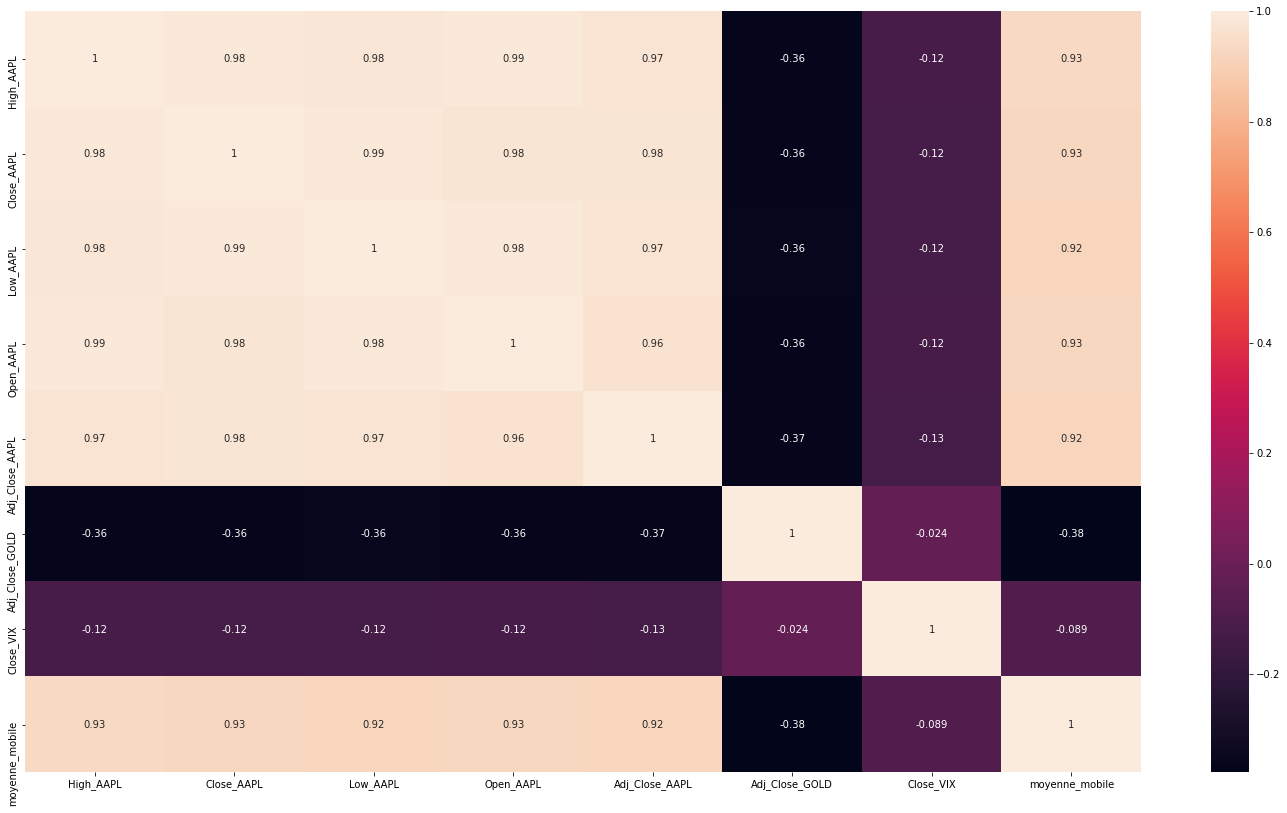

In [555]:
import seaborn as sn
corr_df = df_train_rfe_et_close.corr("kendall")

plt.figure(figsize=(25,14))
sn.heatmap(corr_df, annot=True)
plt.show()

### Preprocessing

In [556]:
import numpy as np

def normalize_min_max(df, col):
    data_stock = df.filter([col])
    dataset_stock = data_stock.values
    scaler_stock_close = MinMaxScaler(feature_range=(0,1))
    normalized_col = scaler_stock_close.fit_transform(dataset_stock)
    
    return normalized_col, scaler_stock_close

## Pour le close on a besoin de garder en variable globale le feature_range=(0,1)
data_stock = df_gafa_and_vix.filter(['Close_AAPL'])
dataset_stock = data_stock.values
scaler_stock_close = MinMaxScaler(feature_range=(0,1))
normalized_col = scaler_stock_close.fit_transform(dataset_stock)

In [557]:
#Normalisation des données
from sklearn.preprocessing import MinMaxScaler
#Normalisation des données

scaled_close, scaler_close = normalize_min_max(df_gafa_and_vix,'Close_AAPL')
scaled_open, scaler_open = normalize_min_max(df_gafa_and_vix,'Open_AAPL')
scaled_adj, scaler_adj = normalize_min_max(df_gafa_and_vix,'Adj_Close_AAPL')
scaled_high, scaler_high = normalize_min_max(df_gafa_and_vix,'High_AAPL')
scaled_low, scaler_low = normalize_min_max(df_gafa_and_vix,'Low_AAPL')

scaled_lgold_adj, scaler_gold_adj = normalize_min_max(df_gafa_and_vix,'Adj_Close_GOLD')

scaled_vix, scaler_vix = normalize_min_max(df_gafa_and_vix,'Close_VIX')
scaled_ma, scaler_ma = normalize_min_max(df_train_rfe_et_close,'moyenne_mobile')

scaled_data=np.concatenate((scaled_close,scaled_open,scaled_adj,scaled_high,scaled_low,scaled_lgold_adj,scaled_vix,scaled_ma),axis=1)

In [558]:
scaled_data.shape

(1931, 8)

### Découpage des données

In [577]:
prop_train_size= 0.7
nb_columns = 8
time_step = 150
training_data_len = int(len(df_gafa_and_vix) * prop_train_size)

In [578]:
array_output = df_stock.values

In [659]:
def split_data(array_train, array_output, prop_train_size, nb_columns):
    """
    
    """
    
    n = len(array_output)
    training_size = int(n*prop_train_size)
    test_size = n- training_size
    
    array_split_train = array_train[:training_size].reshape(-1,nb_columns)
    array_split_test = array_train[training_size:].reshape(-1,nb_columns)
    
    array_split_train_output = array_output[:training_size].reshape(-1,1)
    array_split_test_output = array_output[training_size:].reshape(-1,1)

    
    return array_split_train, array_split_test, array_split_train_output, array_split_test_output

def create_windows_data_XandY(array_split_train, array_split_train_output, time_step ):
    dataX = []
    dataY = []
    y_naif = []
    
    for i in range(len(array_split_train_output)- time_step - 1) : 
        set_value = array_split_train[i : (i+time_step) ,:]
        dataX.append(set_value)
        dataY.append(array_split_train_output[i + time_step])
        if i == 0:
            y_naif.append(0)
        else :
            y_naif.append(array_split_train_output[i + time_step-1])
    return np.array(dataX)[1:,:], np.array(dataY)[1:], np.array(y_naif)[1:]

train_data, test_data ,train_data_y, test_data_y = split_data(scaled_data, scaled_close, prop_train_size, nb_columns)
X_train, Y_train, y_naif_train = create_windows_data_XandY(train_data, train_data_y, time_step)
X_test, Y_test , y_naif_test= create_windows_data_XandY(test_data, test_data_y, time_step)

In [580]:
print(train_data.shape)
print(test_data.shape)
print(type(train_data))
print(type(test_data))

print(train_data_y.shape)
print(test_data_y.shape)
print(type(train_data_y))
print(type(test_data_y))

(1351, 8)
(580, 8)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1351, 1)
(580, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [581]:
print(X_train.shape)
print(Y_train.shape)

(1200, 150, 8)
(1200, 1)


In [582]:
# ############################# METHODE MOHAMED que j'ai pas fini d'implémenter ###############################################

# #Création des données d'entraînement
# train_data = scaled_data[0:training_data_len, :]
# #Création de X_train and y_train
# X_train_close=[]
# X_train_open=[]
# X_train_high=[]
# X_train_low=[]
# X_train_adj=[]
# X_train_vix = []
# X_train_ema = []
# y_train = []

# for k in range(60,len(train_data)):
#     X_train_close.append(train_data[k-60:k,0])
#     X_train_open.append(train_data[k-60:k,1])
#     X_train_adj.append(train_data[k-60:k,2])
#     X_train_high.append(train_data[k-60:k,3])
#     X_train_low.append(train_data[k-60:k,4])
#     X_train_vix.append(train_data[k-60:k,5])
#     X_train_ema.append(train_data[k-60:k,6])
#     y_train.append(train_data[k,0])



# a,b = X_train_close.shape[0],X_train_close.shape[1]

# X_train_close = np.array(X_train_close).reshape(X_train_close, (a,b,1))
# X_train_open = np.array(X_train_open).reshape(X_train_close, (a,b,1))
# X_train_adj = np.array(X_train_adj).reshape(X_train_close, (a,b,1))
# X_train_high= np.array(X_train_high).reshape(X_train_close, (a,b,1))
# X_train_low= np.array(X_train_low).reshape(X_train_close, (a,b,1))
# X_train_ema =  np.array(X_train_ema).reshape(X_train_close, (a,b,1))
# X_train_vix = np.array(X_train_vix).reshape(X_train_close, (a,b,1))

# X_train = np.concatenate((X_train_close,X_train_open,X_train_adj,X_train_high,X_train_low,X_train_vix,X_train_ema),axis=2)



# #Les données doivent être tridimensionnelles pour notre modèle
# X_train_stock = np.reshape(X_train_stock, (X_train_stock.shape[0],X_train_stock.shape[1],1))
# X_train_vix = np.reshape(X_train_vix, (X_train_vix.shape[0],X_train_vix.shape[1],1))
# X_train_ema = np.reshape(X_train_ema, (X_train_ema.shape[0],X_train_ema.shape[1],1))
# X_train_momo = np.concatenate((X_train_stock,X_train_vix,X_train_ema),axis=2)

# #Création des données de test
# test_data = scaled_data[training_data_len - 60: , :]
# #Création de X_test et y_test
# X_test_close=[]
# X_test_open=[]
# X_test_high=[]
# X_test_low=[]
# X_test_adj=[]
# X_test_vix=[]
# X_test_ema=[]
# y_test = []
# y_naif = []

# for k in range(60,len(test_data)):
#     for k in range(60,len(train_data)):
#     X_test_close.append(test_data[k-60:k,0])
#     X_test_open.append(test_data[k-60:k,1])
#     X_test_adj.append(test_data[k-60:k,2])
#     X_train_high.append(test_data[k-60:k,3])
#     X_train_low.append(test_data[k-60:k,4])
#     X_test_vix.append(test_data[k-60:k,5])
#     X_test_ema.append(test_data[k-60:k,6])
#     y_test.append(test_data[k,0])
#     y_naif.append(test_data[k-1,0])
    
# #On met les données d'entraînement en numpy array
# X_test_stock, X_test_vix, X_test_ema = np.array(X_test_stock), np.array(X_test_vix), np.array(X_test_ema)  
# y_test, y_naif = np.array(y_test), np.array(y_naif)


# #Les données doivent être tridimensionnelles pour notre modèle
# X_test_stock = np.reshape(X_test_stock, (X_test_stock.shape[0],X_test_stock.shape[1],1))
# X_test_vix = np.reshape(X_test_vix, (X_test_vix.shape[0],X_test_vix.shape[1],1))
# X_test_ema = np.reshape(X_test_ema, (X_test_ema.shape[0],X_test_ema.shape[1],1))
# X_test = np.concatenate((X_test_stock,X_test_vix,X_test_ema),axis=2)

### Definition des modèles

In [641]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import keras

In [642]:
# #Modèle LSTM
# model = Sequential()

# model.add(LSTM(30, return_sequences=True, input_shape=(time_step,nb_columns)))
# model.add(Dropout(0.3))
# #model.add(LSTM(15, return_sequences=True, input_shape=(X_train.shape[1],7)))
# model.add(LSTM(25, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(18))
# model.add(Dropout(0.2))
# model.add(Dense(1))

model = Sequential()


model.add(LSTM(128, return_sequences=False,input_shape=(time_step,nb_columns)))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "linear"))




In [643]:
#Compilation
# opt = keras.optimizers.Adam(learning_rate=0.07)
# model.compile(loss =  'mean_squared_error', optimizer = opt,  metrics = ["mae"])
adam = keras.optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2 = 0.999, epsilon =1e-8)
model.compile(optimizer=adam, loss='mean_squared_error', metrics = ["mae"])

In [644]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 128)               70144     
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 65        
Total params: 78,465
Trainable params: 78,465
Non-trainable params: 0
_________________________________________________________________


#### Phase d'apprentissage

On fit le modèle avec la validation qui correspond à notre jeu de test
On affiche la barre d'execution et on définit des batch_size relativement petits et un nombre d'epoch qui est un compromis entre temps d'execution et qualité

In [645]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test),  verbose=1)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),  epochs = 100, batch_size=16)

38/38 [==============================] - 9s 235ms/step - loss: 0.0148 - mae: 0.0876 - val_loss: 0.0029 - val_mae: 0.0448
Epoch 1/100
75/75 [==============================] - 13s 178ms/step - loss: 4.3273e-04 - mae: 0.0158 - val_loss: 0.0053 - val_mae: 0.0627
Epoch 2/100
75/75 [==============================] - 12s 156ms/step - loss: 3.1697e-04 - mae: 0.0136 - val_loss: 0.0048 - val_mae: 0.0593
Epoch 3/100
75/75 [==============================] - 12s 160ms/step - loss: 2.9416e-04 - mae: 0.0130 - val_loss: 0.0039 - val_mae: 0.0529
Epoch 4/100
75/75 [==============================] - 11s 143ms/step - loss: 2.7667e-04 - mae: 0.0126 - val_loss: 0.0039 - val_mae: 0.0530
Epoch 5/100
75/75 [==============================] - 11s 143ms/step - loss: 2.6070e-04 - mae: 0.0122 - val_loss: 0.0033 - val_mae: 0.0490
Epoch 6/100
75/75 [==============================] - 10s 131ms/step - loss: 2.5029e-04 - mae: 0.0120 - val_loss: 0.0036 - val_mae: 0.0514
Epoch 7/100
75/75 [==============================] 

75/75 [==============================] - 12s 158ms/step - loss: 1.1820e-04 - mae: 0.0081 - val_loss: 9.1392e-04 - val_mae: 0.0235
Epoch 59/100
75/75 [==============================] - 13s 174ms/step - loss: 1.1241e-04 - mae: 0.0079 - val_loss: 7.5628e-04 - val_mae: 0.0212
Epoch 60/100
75/75 [==============================] - 11s 144ms/step - loss: 1.1533e-04 - mae: 0.0080 - val_loss: 8.3705e-04 - val_mae: 0.0221
Epoch 61/100
75/75 [==============================] - 11s 142ms/step - loss: 1.1047e-04 - mae: 0.0078 - val_loss: 5.8488e-04 - val_mae: 0.0181
Epoch 62/100
75/75 [==============================] - 11s 143ms/step - loss: 1.1763e-04 - mae: 0.0081 - val_loss: 6.5762e-04 - val_mae: 0.0192
Epoch 63/100
75/75 [==============================] - 10s 137ms/step - loss: 1.1467e-04 - mae: 0.0080 - val_loss: 5.9976e-04 - val_mae: 0.0183
Epoch 64/100
75/75 [==============================] - 10s 129ms/step - loss: 1.0826e-04 - mae: 0.0077 - val_loss: 6.1460e-04 - val_mae: 0.0184
Epoch 65/100

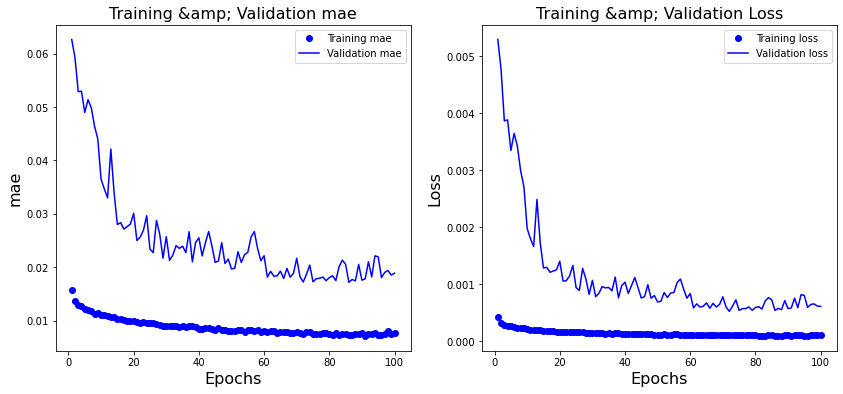

In [646]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(epochs, accuracy, 'bo', label='Training mae')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation mae')
ax[0].set_title('Training &amp; Validation mae', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('mae', fontsize=16)
ax[0].legend()
 
ax[1].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training &amp; Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

##### Modele 2

In [656]:
model2 = Sequential()


model2.add(LSTM(128, return_sequences=False,input_shape=(time_step,nb_columns)))
model2.add(Dropout(0.4))
model2.add(Dense(64, activation = "relu"))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation = "linear"))

#e-5
adam2 = keras.optimizers.Adam(lr=1e-6, beta_1=0.9, beta_2 = 0.999, epsilon =1e-8)
model2.compile(optimizer=adam2, loss='mean_squared_error', metrics = ["mae"])

model2.summary()

model2.fit(X_train, Y_train, validation_data = (X_test, Y_test),  verbose=1)
history2 = model2.fit(X_train, Y_train, validation_data=(X_test, Y_test),  epochs = 150, batch_size=8)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 128)               70144     
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 65        
Total params: 78,465
Trainable params: 78,465
Non-trainable params: 0
_________________________________________________________________
38/38 [==============================] - 21s 564ms/step - loss: 0.0269 - mae: 0.1246 - val_loss: 0.0142 - val_mae: 

150/150 [==============================] - 25s 168ms/step - loss: 9.1367e-04 - mae: 0.0224 - val_loss: 0.0018 - val_mae: 0.0357
Epoch 53/150
150/150 [==============================] - 23s 155ms/step - loss: 8.9717e-04 - mae: 0.0222 - val_loss: 0.0029 - val_mae: 0.0476
Epoch 54/150
150/150 [==============================] - 25s 164ms/step - loss: 8.7728e-04 - mae: 0.0219 - val_loss: 0.0039 - val_mae: 0.0569
Epoch 55/150
150/150 [==============================] - 24s 157ms/step - loss: 8.4622e-04 - mae: 0.0220 - val_loss: 0.0028 - val_mae: 0.0473
Epoch 56/150
150/150 [==============================] - 25s 166ms/step - loss: 9.0236e-04 - mae: 0.0226 - val_loss: 0.0028 - val_mae: 0.0470
Epoch 57/150
150/150 [==============================] - 25s 166ms/step - loss: 8.4136e-04 - mae: 0.0218 - val_loss: 0.0012 - val_mae: 0.0281
Epoch 58/150
150/150 [==============================] - 25s 164ms/step - loss: 8.3591e-04 - mae: 0.0214 - val_loss: 0.0019 - val_mae: 0.0381
Epoch 59/150
150/150 [====

Epoch 110/150
150/150 [==============================] - 24s 160ms/step - loss: 6.6526e-04 - mae: 0.0194 - val_loss: 0.0022 - val_mae: 0.0414
Epoch 111/150
150/150 [==============================] - 25s 166ms/step - loss: 6.7651e-04 - mae: 0.0191 - val_loss: 6.4934e-04 - val_mae: 0.0196
Epoch 112/150
150/150 [==============================] - 22s 145ms/step - loss: 6.5144e-04 - mae: 0.0191 - val_loss: 0.0015 - val_mae: 0.0337
Epoch 113/150
150/150 [==============================] - 23s 151ms/step - loss: 6.7248e-04 - mae: 0.0192 - val_loss: 0.0013 - val_mae: 0.0306
Epoch 114/150
150/150 [==============================] - 26s 170ms/step - loss: 6.0945e-04 - mae: 0.0184 - val_loss: 8.1826e-04 - val_mae: 0.0228
Epoch 115/150
150/150 [==============================] - 27s 179ms/step - loss: 6.7384e-04 - mae: 0.0193 - val_loss: 0.0024 - val_mae: 0.0443
Epoch 116/150
150/150 [==============================] - 26s 175ms/step - loss: 5.6700e-04 - mae: 0.0180 - val_loss: 0.0011 - val_mae: 0.027

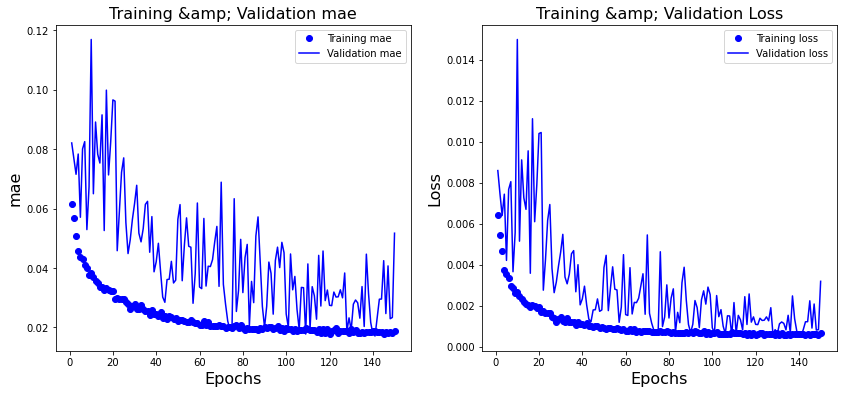

In [658]:
history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
accuracy2 = history_dict2['mae']
val_accuracy2 = history_dict2['val_mae']
 
epochs = range(1, len(loss_values2) + 1)
fig2, ax2 = plt.subplots(1, 2, figsize=(14, 6))

ax2[0].plot(epochs, accuracy2, 'bo', label='Training mae')
ax2[0].plot(epochs, val_accuracy2, 'b', label='Validation mae')
ax2[0].set_title('Training &amp; Validation mae', fontsize=16)
ax2[0].set_xlabel('Epochs', fontsize=16)
ax2[0].set_ylabel('mae', fontsize=16)
ax2[0].legend()
 
ax2[1].plot(epochs, loss_values2, 'bo', label='Training loss') 
ax2[1].plot(epochs, val_loss_values2, 'b', label='Validation loss')
ax2[1].set_title('Training &amp; Validation Loss', fontsize=16)
ax2[1].set_xlabel('Epochs', fontsize=16)
ax2[1].set_ylabel('Loss', fontsize=16)
ax2[1].legend()

#### Prédiction

In [649]:
prediction_test_scaled = model.predict(X_test)
prediction_train_scaled = model.predict(X_train)


On effectue la transformation inverse du Min Max scaler du close

In [650]:
prediction_test = scaler_stock_close.inverse_transform(prediction_test_scaled)
prediction_train = scaler_stock_close.inverse_transform(prediction_train_scaled)

In [651]:
test = scaler_stock_close.inverse_transform(Y_test)
train = scaler_stock_close.inverse_transform(Y_train)

### Mesure de la performance

Dans ce modèle nous essayons de prédire le prix journalier de fermeture de l'action d'Apple. Suite à différents test et modèles nous sommes parvenu àla conclusion qu'une prédiction dite naive existait. Cette prédiction Y_naif consiste à prédire pour le jour j, le prix du jour j-1. Nous considérons cette prédiction comme notre baseline et nous tentons de faire mieux.

In [652]:
data_close = df_gafa_and_vix[['Close_AAPL']].reset_index(drop=True)
data= data_close.copy()

# y_naif = data.shift(1)
# y_naif_train = y_naif[:training_data_len]
# y_naif_test= y_naif[training_data_len:]

print(type(y_naif))

<class 'pandas.core.frame.DataFrame'>


In [653]:
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(train,prediction_train)))
print(math.sqrt(mean_squared_error(test,prediction_test)))

#print(mean_squared_error(Y_test,np.zeros(len(Y_test))))

# 0.7100540812944801
# 4.734941717531359

# 1.1348625525633198
# 4.341274494072565

0.47239060790668314
1.0909121596762463


In [614]:
y_naif.shape

(1931, 1)

In [662]:
print(math.sqrt(mean_squared_error(test[1:],y_naif_test)))


46.64218035876991


In [616]:
#Baseline
rmse_naif = np.sqrt(np.mean(y_naif- test)**2)
rmse_naif

ValueError: Unable to coerce to DataFrame, shape must be (1931, 1): given (429, 1)

In [617]:
#Calcul de l'erreur
prediction_scaled2 = np.reshape(prediction_scaled,y_test.shape)
rmse = np.sqrt(np.mean(prediction_scaled2 - y_test)**2)
rmse

AttributeError: 'list' object has no attribute 'shape'

### Affichage

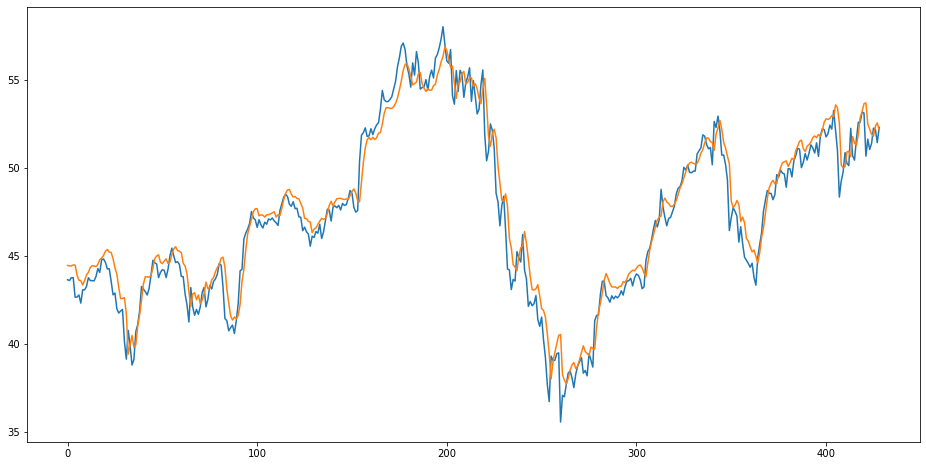

In [654]:
plt.figure(figsize=(16,8))

plt.plot(test, label ="test")
plt.plot(prediction_test)
plt.show()

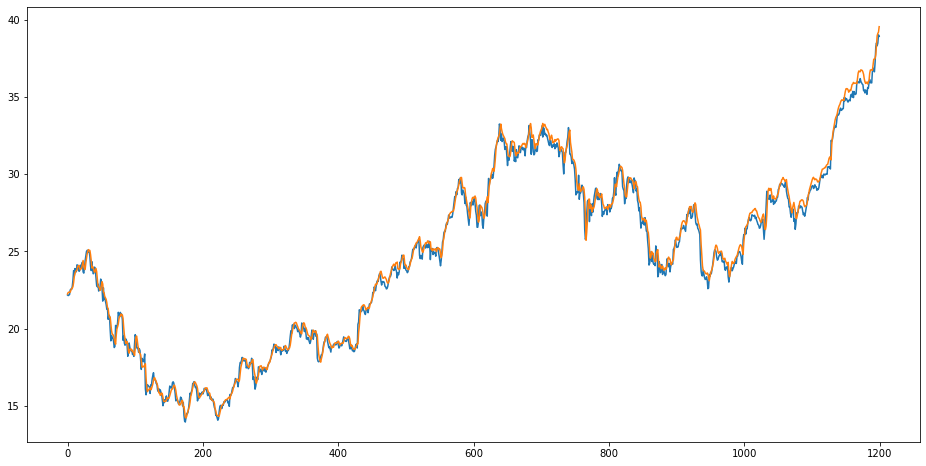

In [655]:
plt.figure(figsize=(16,8))

plt.plot(train, label ="train")
plt.plot(prediction_train)
plt.show()

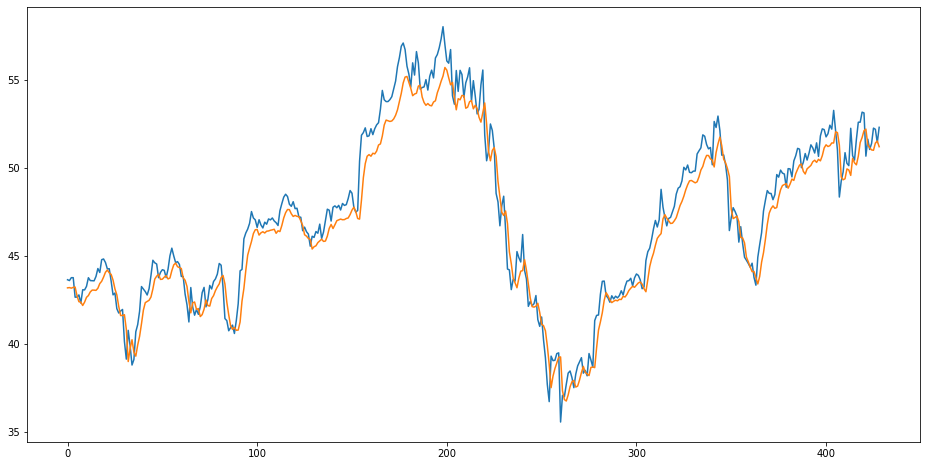

In [618]:
plt.figure(figsize=(16,8))

plt.plot(test, label ="test")
plt.plot(prediction_test)
plt.show()

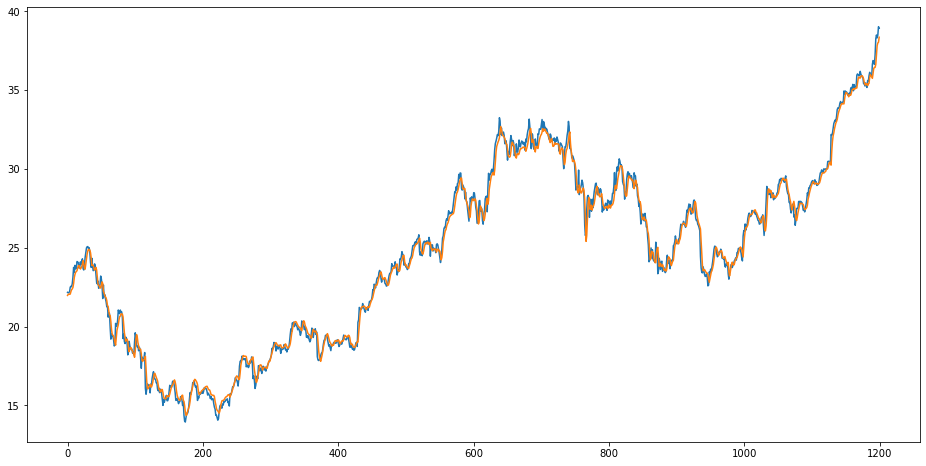

In [619]:
plt.figure(figsize=(16,8))

plt.plot(train, label ="train")
plt.plot(prediction_train)
plt.show()

### Il y a en annexe d'autres méthodes plus classiques que les LSTM, comme les forets aléatoires, les régressions linéaires, lassso, XGboost.

In [598]:
print(train.mean())
print(test.mean())
print(train.std())
print(test.std())

24.61419492085775
47.144085161613695
5.700135405812416
4.8597167201749105
